In [91]:
import uproot
import h5py
import numpy as np
import os
import awkward as awk
import heplot as hepl
import importlib
import glob

In [92]:
import sys
sys.path.append('../src/')

In [109]:
from heplot import plotting as heplt
import selection as sele
import string_constants as stco
import reader as read

In [110]:
# lightjet dataset dir
dir_root_lightjet = '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2/mc20_Run2/Ntuples/PeriodE/ZJets_MG'

In [111]:
ds_ids = {
    'ee' : ['506193', '506194', '506195'],
    'mumu' : ['506196', '506197', '506198'],
    'tautau': ['512198', '512199', '512200']
}

In [112]:
feature_names = ['el_e','mu_e','el_charge','mu_charge','el_pt','mu_pt', 'el_phi','mu_phi',\
                      'el_eta', 'mu_eta', 'jet_e', 'jet_GN2_pu', 'jet_GN2_pb', 'jet_GN2_pc']

## di-electron

In [113]:
path_ee = glob.glob(os.path.join(dir_root_lightjet,'*'+ds_ids['ee'][0]+'*'))[0]

In [114]:
path_ee

'/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2/mc20_Run2/Ntuples/PeriodE/ZJets_MG/user.ltoffoli.mc20_13TeV.506193.MGPy8EG_3jets_HT2bias_BFilter.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root'

In [104]:
fname_ee = os.listdir(path_ee)[3]

In [105]:
fname_ee

'user.ltoffoli.35094310._000002.output.root'

In [115]:
samples_ee = read.read_samples_from_file(os.path.join(path_ee,fname_ee),feature_names)

In [116]:
len(samples_ee)

1594528

In [38]:
samples_selected = sele.select(samples_ee)

In [39]:
len(samples_selected)

1024776

In [41]:
samples_selected.fields

['el_e',
 'mu_e',
 'el_charge',
 'mu_charge',
 'el_pt',
 'mu_pt',
 'el_phi',
 'mu_phi',
 'el_eta',
 'mu_eta',
 'jet_e',
 'jet_GN2_pu',
 'jet_GN2_pb',
 'jet_GN2_pc']

In [66]:
samples_selected['el_e'].ndim

2

## compute dilepton pt, invariant mass, px,py,pz

In [56]:
# compute invariant mass of electrons
ele_m, mu_m = 511e-3, 105.7
samples_selected['ee_m'] = sele.calc_invariant_mass(samples_selected.el_pt, samples_selected.el_eta, samples_selected.el_phi, part_m=ele_m)

In [57]:
samples_selected['ee_pt'] = sele.calc_dilepton_pt(samples_selected.el_pt, samples_selected.el_eta, samples_selected.el_phi)

In [58]:
px, py, pz = sele.calc_dilepton_px_py_pz(samples_selected.el_pt, samples_selected.el_eta, samples_selected.el_phi)

In [59]:
samples_selected['ee_px'] = px
samples_selected['ee_py'] = py
samples_selected['ee_pz'] = pz

In [82]:
importlib.reload(heplt)

<module 'heplot.plotting' from '/eos/home-k/kiwoznia/dev/phys_global/physkiplot/src/heplot/plotting.py'>

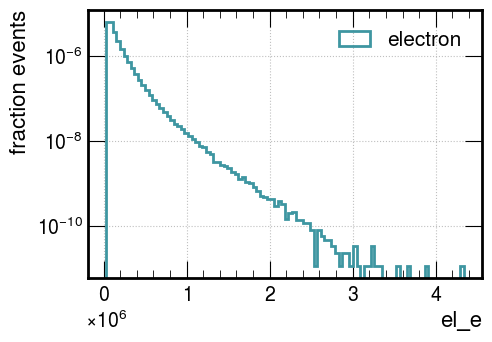

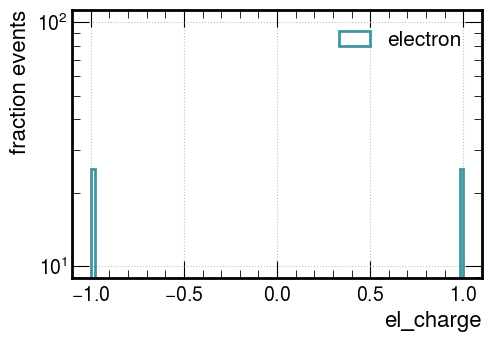

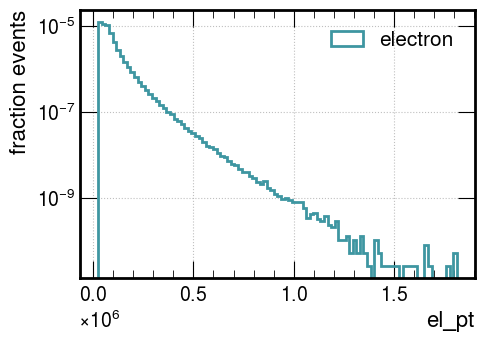

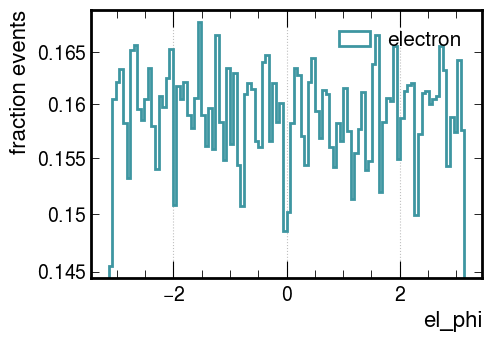

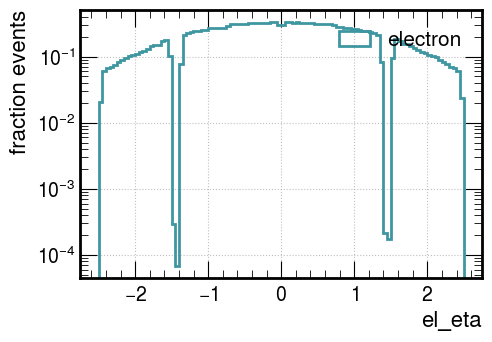

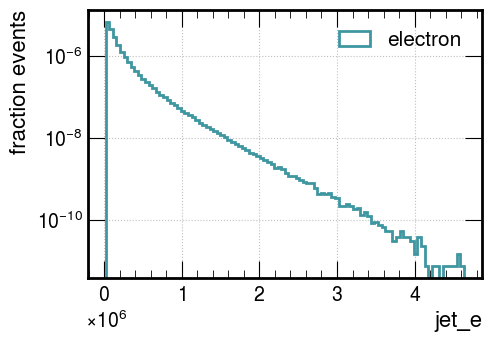

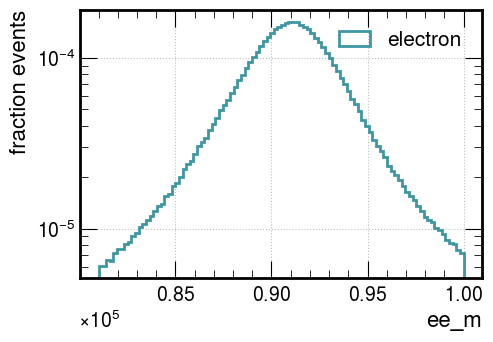

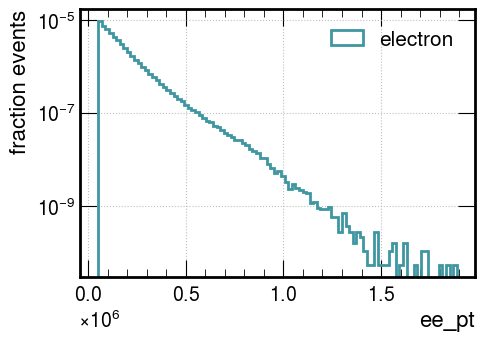

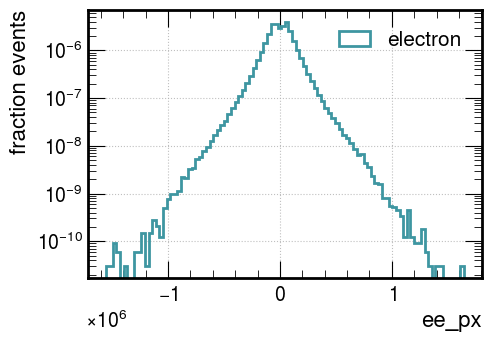

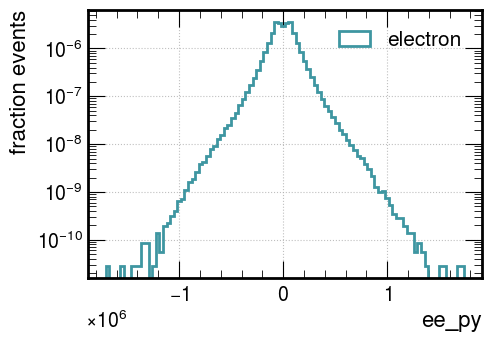

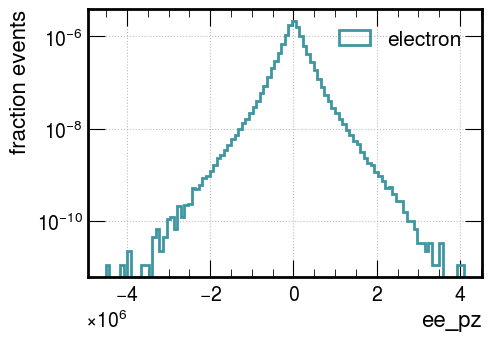

In [83]:
for ff in ['el_e','el_charge','el_pt', 'el_phi','el_eta', 'jet_e','ee_m', 'ee_pt', 'ee_px', 'ee_py', 'ee_pz']:
    dd = samples_selected[ff]
    data = [awk.flatten(dd) if dd.ndim >=2 else dd]
    sample_names = ['electron']
    heplt.plot_feature_for_n_samples(data,sample_names,xlabel=ff,show_plt=True,legend_outside=False)

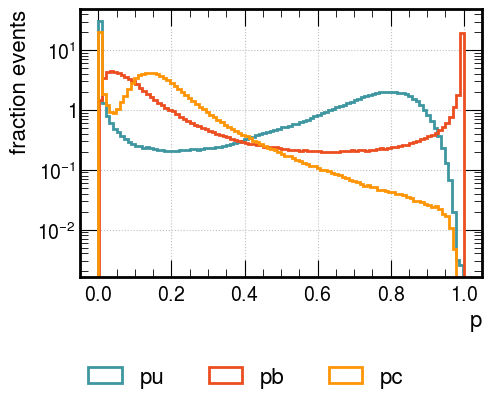

In [84]:
ff_names = ['pu','pb','pc']
data = [awk.flatten(samples_selected[ff]) for ff in ['jet_GN2_pu', 'jet_GN2_pb', 'jet_GN2_pc']]
heplt.plot_feature_for_n_samples(data,ff_names,xlabel='p',show_plt=True)

In [76]:
samples_selected['jet_GN2_pc']

<Array [[0.0168, 0.153], ... [0.0891, 0.00556]] type='1024776 * var * float64'>

### up to 15 jets per event!

In [78]:
np.unique(awk.num(samples_selected['jet_GN2_pc']))

<Array [1, 2, 3, 4, 5, ... 11, 12, 13, 14, 15] type='15 * int64'>

In [79]:
np.unique(awk.num(samples_selected['jet_e']))

<Array [1, 2, 3, 4, 5, ... 11, 12, 13, 14, 15] type='15 * int64'>

In [118]:
kine_features_ee = ['el_'+kk for kk in ['e','charge','pt', 'phi','eta']]+ ['jet_e'] + ['ee_'+kk for kk in ['m', 'pt', 'px', 'py', 'pz']]

In [131]:
for ff_ee in kine_features_ee:
    label = ff_ee[3:]+'_l' if ff_ee.startswith('el_') else ff_ee[3:]+'_ll' if ff_ee.startswith('ee_') else ff_ee
    print(label)

e_l
charge_l
pt_l
phi_l
eta_l
jet_e
m_ll
pt_ll
px_ll
py_ll
pz_ll


In [125]:
data = [dd+[10] if len(dd)==3 else dd for dd in [[5,6,7],[1,2,3,4]]]

In [126]:
data

[[5, 6, 7, 10], [1, 2, 3, 4]]

In [127]:
path_ee = glob.glob(os.path.join(stco.generator_in_dir_lightjet,'*'+stco.ds_ids['ee'][0]+'*'))

In [128]:
path_ee

['/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2/mc20_Run2/Ntuples/PeriodE/ZJets_MG/user.ltoffoli.mc20_13TeV.506193.MGPy8EG_3jets_HT2bias_BFilter.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root']